# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [12]:
import pandas as pd

## imports for Python, Pandas

In [13]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [14]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [15]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [16]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [75]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [77]:
pd.reset_option("^display")
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [21]:
json_orig_df = pd.read_json('data/world_bank_projects.json')
json_orig_df.head(5)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


First question is asking us to find the 10 countries with the most projects. To get a better idea of where to start, we're going to start by looking at some more background information regarding the data we're working with (i.e. column names, info(), etc.)

In [46]:
a = json_orig_df
a.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

The first columns of importance are country_namecode, countrycode, countryname and countryshortname.

In [59]:
import matplotlib.pyplot as plt
b = a.countryshortname.value_counts().head(10)
b1 = b.reset_index()
b1.columns = ['Country', 'Count']
rank_list = list(range(1, 11))
b1['rank'] = rank_list
b1 = b1.set_index('rank')
b1

,Country,Count
rank,,
1,Indonesia,19
2,China,19
3,Vietnam,17
4,India,16
5,"Yemen, Republic of",13
6,Morocco,12
7,Bangladesh,12
8,Nepal,12
9,Africa,11


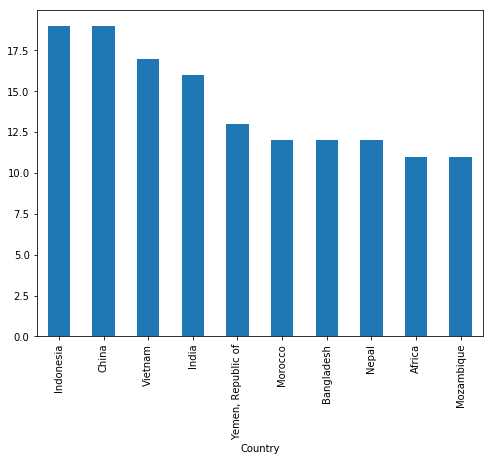

In [70]:
b1.plot(kind = 'bar', x = 'Country', figsize=(8,6), legend=False)

So we've got a list of the top ten countries yet at #9 the country is listed as Africa. This is a continent, so some further investigation is needed to determine what is going on here.

In [63]:
from IPython.display import display
pd.options.display.max_columns = None

africa = a[a.countryshortname == 'Africa']
africa

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,docty,envassesmentcategorycode,grantamt,ibrdcommamt,id,idacommamt,impagency,lendinginstr,lendinginstrtype,lendprojectcost,majorsector_percent,mjsector_namecode,mjtheme,mjtheme_namecode,mjthemecode,prodline,prodlinetext,productlinetype,project_abstract,project_name,projectdocs,projectfinancialtype,projectstatusdisplay,regionname,sector,sector1,sector2,sector3,sector4,sector_namecode,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
45,{'$oid': '52b213b38594d8a2be17c7ad'},2014,September,2013-09-12T00:00:00Z,ECOWAS,NaN,Africa!$!3A,3A,Africa,Africa,"Project Information Document,Integrated Safegu...",C,10000000,0,P125018,0,WAHO,Investment Project Financing,IN,10750000,"[{'Percent': 100, 'Name': 'Health and other so...","[{'code': 'JX', 'name': 'Health and other soci...",[Human development],"[{'code': '8', 'name': 'Human development'}, {...","8,10",RE,Recipient Executed Activities,L,NaN,West Africa Regional Disease Surveillance Cap...,"[{'DocDate': '28-MAR-2013', 'EntityID': '09022...",OTHER,Active,Africa,[{'Name': 'Health'}],"{'Percent': 100, 'Name': 'Health'}",NaN,NaN,NaN,"[{'code': 'JA', 'name': 'Health'}]",JA,IBRD,Active,N,"{'Percent': 100, 'Name': 'Health system perfor...","[{'code': '67', 'name': 'Health system perform...",67,0,10000000,http://www.worldbank.org/projects/P125018/west...
46,{'$oid': '52b213b38594d8a2be17c7ae'},2014,September,2013-09-10T00:00:00Z,UGANDA-COMOROS,2018-06-30T00:00:00Z,Africa!$!3A,3A,Africa,Africa,"Financing Agreement,Disbursement Letter,Projec...",B,0,0,P118213,22000000,RELEVANT MINISTRIES IN CHARGE OF TELECOM/ICT P...,Adaptable Program Loan,IN,22000000,"[{'Percent': 60, 'Name': 'Information and comm...","[{'code': 'CX', 'name': 'Information and commu...","[Public sector governance, Rural development, ...","[{'code': '2', 'name': 'Public sector governan...","2,10,4,4",PE,IBRD/IDA,L,{'cdata': 'The development objectives of Fourt...,RCIP4 - Regional Communications Infrastructure...,"[{'DocDate': '24-SEP-2013', 'EntityID': '09022...",IDA,Active,Africa,"[{'Name': 'Telecommunications'}, {'Name': 'Inf...","{'Percent': 60, 'Name': 'Telecommunications'}","{'Percent': 30, 'Name': 'Information technology'}","{'Percent': 10, 'Name': 'Public administration...",NaN,"[{'code': 'CT', 'name': 'Telecommunications'},...","BM,CA,CT",IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,40,78,25",22000000,22000000,http://www.worldbank.org/projects/P118213/rcip...
51,{'$oid': '52b213b38594d8a2be17c7b3'},2014,September,2013-09-04T00:00:00Z,"OSS, IUCN, CILSS",NaN,Africa!$!3A,3A,Africa,Africa,"Project Appraisal Document,Project Information...",C,4630000,0,P130888,0,"OSS, IUCN, CILSS/AGRYHMET",Specific Investment Loan,IN,4630000,"[{'Percent': 50, 'Name': 'Water, sanitation an...","[{'code': 'WX', 'name': 'Water, sanitation and...","[Environment and natural resources management,...","[{'code': '11', 'name': 'Environment and natur...","11,11,11,11,11",GE,Global Environment Project,L,{'cdata': 'The objective of the Building Resil...,"Building Resilience through Innovation, Commun...","[{'DocDate': '09-AUG-2013', 'EntityID': '00033...",OTHER,Active,Africa,"[{'Name': 'General water, sanitation and flood...","{'Percent': 50, 'Name': 'General water, sanita...","{'Percent': 20, 'Name': 'General agriculture, ...","{'Percent': 20, 'Name': 'Agricultural extensio...","{'Percent': 10, 'Name': 'Irrigation and draina...","[{'code': 'WZ', 'name': 'General water, sanita...","AI,AB,AZ,WZ",IBRD,Active,N,"{'Percent': 20, 'Name': 'Biodiversity'}","[{'code': '80', 'name': 'Biodiversity'}, {'cod...","85,82,81,83,80",0,4630000,http://www.worldbank.org/projects/P130888/buil...
58,{'$oid': '52b213b38594d8a2be17c7ba'},2014,August,2013-08-28T00:00:00Z,BANK EXECUTED,NaN,Africa!$!3A,3A,Africa,Africa,Na

So from the looks of it, the borrower column may provide some clues as to exactly which country each observation corresponds to. From this column we can gather that there are a few countries listed: Uganda, Burundi, Rwanda, Tanzania, Mali, Malawi, Mozambique, Zambia and Niger. However, we shouldn't stop there. Why are there multiple countries listed in the borrower columns for these particular observations? As it happens, there is a column, project_name, that may be able to help us out. 

In [71]:
# display max width of columns
pd.set_option('display.max_colwidth', -1)

borrower = africa[['borrower', 'project_name']]
borrower

,borrower,project_name
45,ECOWAS,West Africa Regional Disease Surveillance Capacity Strengthening
46,UGANDA-COMOROS,RCIP4 - Regional Communications Infrastructure Program - APL 4
51,"OSS, IUCN, CILSS","Building Resilience through Innovation, Communication & Knowledge Svcs"
58,BANK EXECUTED,Fighting against wildlife poaching and illegal trade in Africa
65,"BURUNDI,RWANDA,TANZANIA",Regional Rusumo Falls Hydroelectric Project
99,GOVERNMENT OF MALI,Additional Financing-West Africa Agricultural Productivity Program 2A
167,MINISTRIES OF TELECOM AND ICT,West Africa Regional Communications Infrastructure Project - APL 2
184,TANZANIA,Southern Africa Trade and Transport Facilitation Project
287,"MALAWI, MOZAMBIQUE, ZAMBIA",Agricultural Productivity Program for Southern Africa (APPSA)
353,NILE BASIN INITIATIVE,Nile Cooperation for Results Project


Looking in the project_name column, now we can get a little clarity as to why 'Africa' was listed as a country. It looks like most of these projects were regionally-based, with multiple African countries involved. 

1. ECOWAS - Economic Community of West African States (Cape Verde, Gambia, Guinea, Guinea-Bissau, Liberia, Mali, Senegal, Sierra Leone, Benin, Burkina Faso, Ghana, Ivory Coast, Niger, Nigeria, Togo)
2. Uganda (country in East-Central Africa), Comoros (island country off the eastern coast of Afica)
3. 
### WILL CONTINUE DEVELOPING

### 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

In [132]:
from IPython.display import display
pd.options.display.max_columns = None

a = json.load((open('data/world_bank_projects.json')))

In [133]:
type(a)

list

In [141]:
a1 = json_normalize(a, 'mjtheme_namecode')
a1.head(10)

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [146]:
a1.code.value_counts().reset_index()

,index,code
0,11,250
1,10,216
2,8,210
3,2,199
4,6,168
5,4,146
6,7,130
7,5,77
8,9,50
9,1,38


In [94]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [95]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [96]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich
